<h1 align="center"> Project 1 Report</h1>

<div align="center"> Author: 19307130109 梁力天</div>


github: https://github.com/Liang-lt/Computer-Vision-Project1


# Abstract
The project is about train a two-layer neural network based on the dataset MINIST.
The best model is available <a href =https://pan.baidu.com/s/1AVXUFDBVcRu3h0dcPPKBKg>here</a> 
with password '50wd'.
The two-layer model is composed by two matrices called weights and two vectors called biases with activation function. I use the function 'sigmoid' as the activation and 'softmax' as the output layer function. The testing accurracy of the best model I have trained reaches 97.5%.
Please see more details on gitHub page.

## 1. Training

### Load the dataset

In [1]:
from dataset import load_mnist

path = './'
train_img, train_label = load_mnist(path=path, kind='train', normalize=True)
test_img, test_label = load_mnist(path=path, kind='t10k', normalize=True)
dataset = (train_img, train_label, test_img, test_label)
print('training size: ', len(train_img))
print('testing size: ', len(test_img))

training size:  60000
testing size:  10000


### Set the hyperparameters

In [2]:
# Hyperparameters
import random

# num of iterations
iters_num = 10000
train_size = train_img.shape[0]
# num of data used for training per iteration
batch_size = 100
learning_rate = 0.01
random.seed(1234)
iter_per_epoch = max(train_size / batch_size, 1)
# the way learning rate decay 
lr_decay = 'momentum'

Some hyperparameters should be set first. 'iters_num' represents how many iterations we should do. 'batch_size' represents how many training samples we randomly choose to put per iteration. 'Learning_rate' represents the step size. 'iter_per_epoch' represents how many iterations we do a test. 'lr_decay' represents the way we do learning rate decay.

The momentum update:
$$
w^{t+1} = w^t - \alpha_t \nabla f(w^t) + \beta_t(w^t-w^{t-1})
$$
By using this formulation, we can set a small learning rate $\alpha$ at beginning, and the step size will modify with learning.

### Train a model

In [3]:
import time
import numpy as np
from twolayerNet import TwoLayerNet
import matplotlib.pyplot as plt
# training a new network
start = time.time()
network = TwoLayerNet(input_size=784, hidden_size=500, output_size=10, reg=1e-5)
training_info, best_acc, best_params = \
    network.fit(dataset, iters_num, learning_rate, lr_decay, iter_per_epoch, batch_size, loss_type='mse_error')
end = time.time()
print('Training Time: %s Seconds' %(end-start))
network.save(path + 'model')

iter:0, train acc: 0.17815, test acc: 0.1824
iter:600, train acc: 0.9220666666666667, test acc: 0.924
iter:1200, train acc: 0.9417166666666666, test acc: 0.9387
iter:1800, train acc: 0.9511166666666667, test acc: 0.9454
iter:2400, train acc: 0.957, test acc: 0.9515
iter:3000, train acc: 0.9622333333333334, test acc: 0.9544
iter:3600, train acc: 0.9661166666666666, test acc: 0.9581
iter:4200, train acc: 0.96925, test acc: 0.9587
iter:4800, train acc: 0.9735833333333334, test acc: 0.962
iter:5400, train acc: 0.9760833333333333, test acc: 0.9628
iter:6000, train acc: 0.9778666666666667, test acc: 0.9651
iter:6600, train acc: 0.9792833333333333, test acc: 0.965
iter:7200, train acc: 0.9808333333333333, test acc: 0.9658
iter:7800, train acc: 0.9827166666666667, test acc: 0.9686
iter:8400, train acc: 0.9838166666666667, test acc: 0.9682
iter:9000, train acc: 0.98565, test acc: 0.9705
iter:9600, train acc: 0.9865333333333334, test acc: 0.9704
Training Time: 113.36886692047119 Seconds


Although I have added the regularization part in loss function and gradient function, the model still seems overfitting. The accuracy on training samples is higher than on testing samples.

### Draw the loss and accuracy

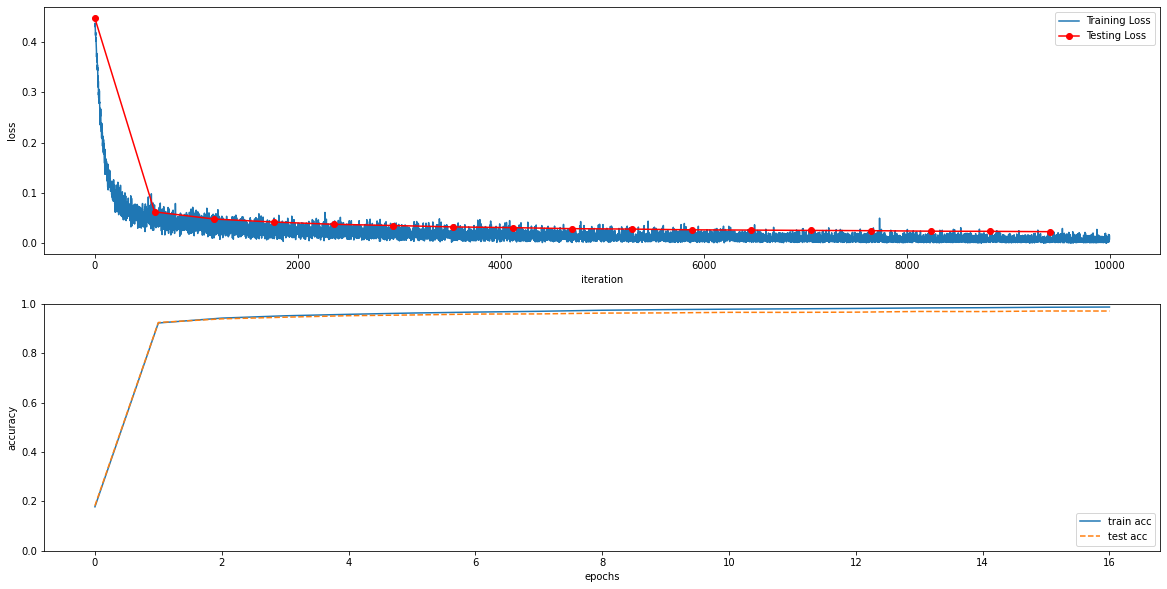

In [4]:
from plot_ import plot_
plot_(training_info)

During training, the loss of both training and testing is decreasing. There are some waves but the trend is decreasing. Under these hyperparameters, use more time to train and I get the best model.

### Load the best model

In [5]:
import pickle
def load(path):
    obj = None
    with open(path, "rb") as f:
        try:
            obj = pickle.load(f)
        except:
            print("Error")
    return obj

In [6]:
network = load(path + 'bestmodel')
test_acc = network.accuracy(test_img, test_label)
print(test_acc)

0.975


## 2. Hyperparameter searching

### Hidden layer size

/Users/lltnew/Desktop/FDU/大三下/CV/project1/twolayerNet.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


hidden layer size: 100 Accuracy for test: 0.9504


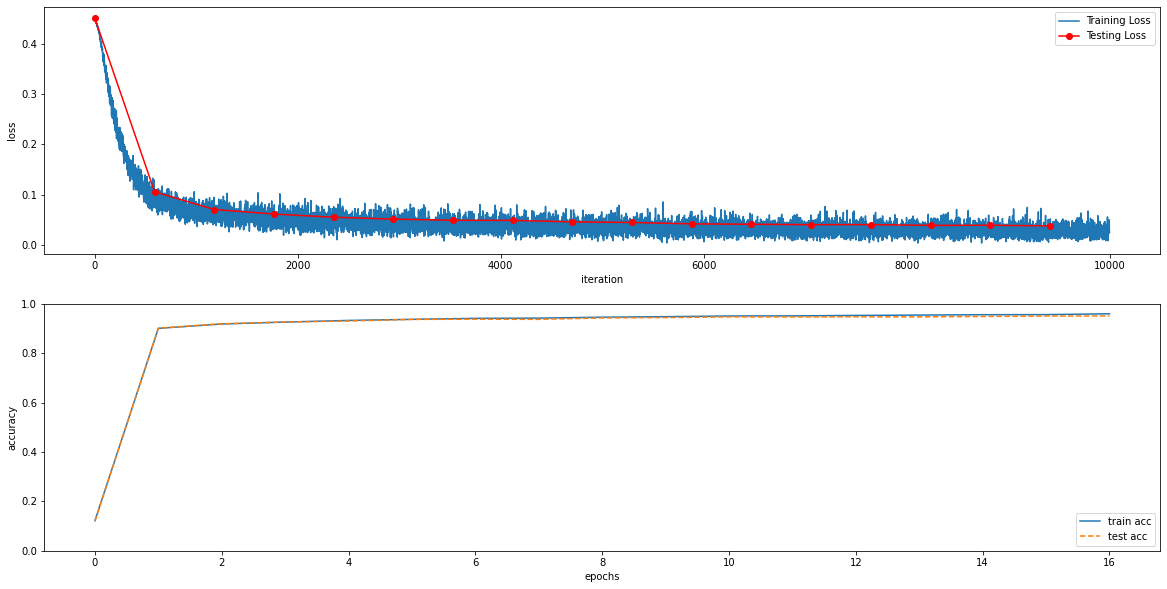

Training Time: 32.56316113471985 Seconds

hidden layer size: 200 Accuracy for test: 0.9632


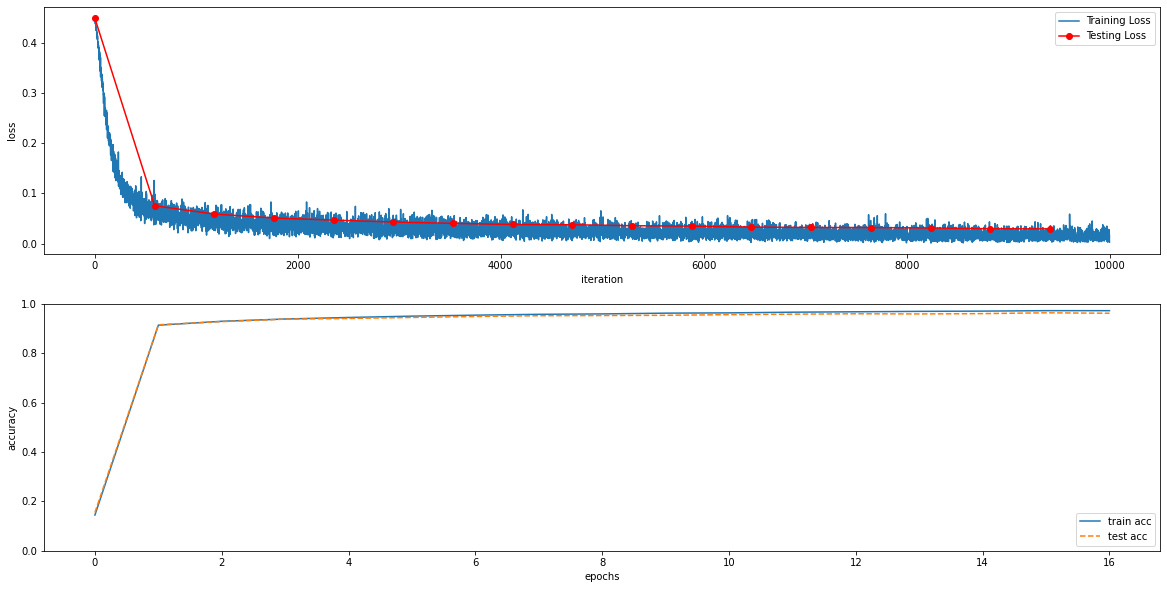

Training Time: 52.786895990371704 Seconds

hidden layer size: 300 Accuracy for test: 0.9679


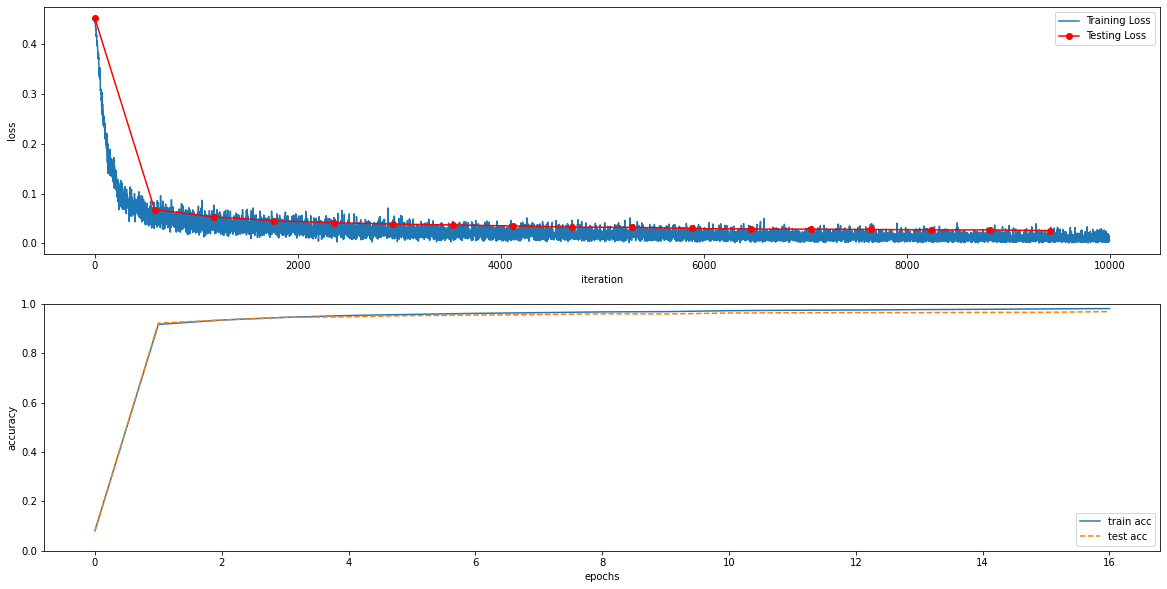

Training Time: 75.99173212051392 Seconds



In [7]:
from twolayerNet import TwoLayerNet
random.seed(1234)
hidden_size_list = [100, 200, 300]
for hidden_size in hidden_size_list:
    start = time.time()
    network = TwoLayerNet(input_size=784, hidden_size=hidden_size, output_size=10, reg=1e-5)
    training_info, best_acc, best_params = \
        network.fit(dataset, iters_num, learning_rate, lr_decay, iter_per_epoch, batch_size, p='False')
    print('hidden layer size: ' + str(hidden_size) + ' Accuracy for test: ' + str(best_acc))
    plot_(training_info)
    end = time.time()
    print('Training Time: %s Seconds' %(end-start))
    print('')

It can be found that the more units in the hidden layer, the more time we cost to train the model in the same iterations. Also, with the number of units increasing in some extent, the accuracy of testing increases together. The number 500 might be a good choice.

### Learning rate

/Users/lltnew/Desktop/FDU/大三下/CV/project1/twolayerNet.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Learning rate: 0.1 Accuracy for test: 0.9357


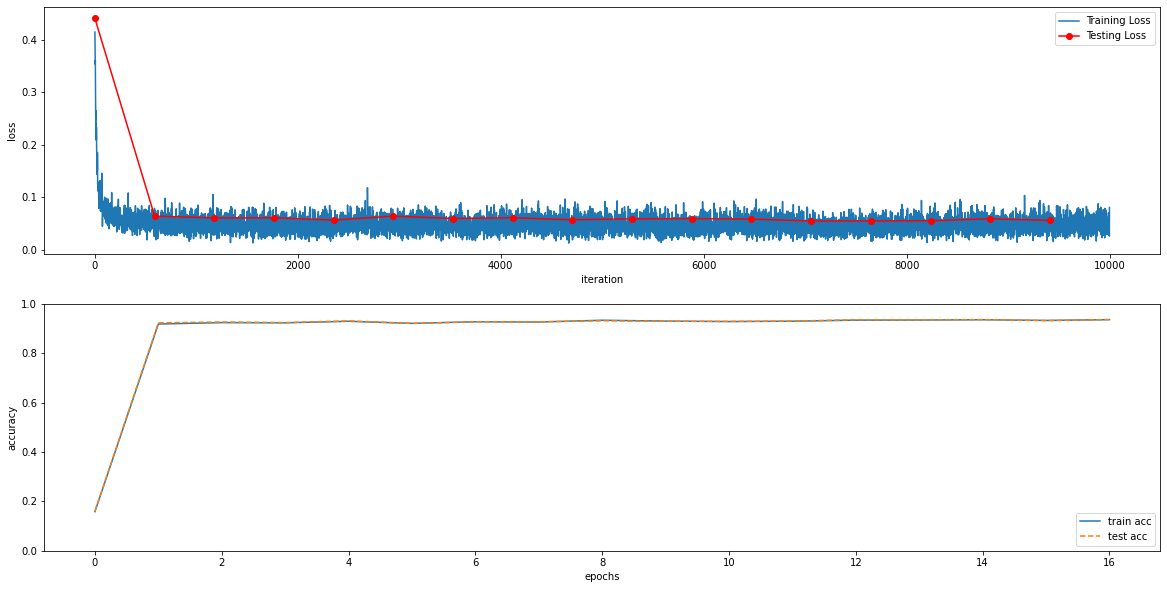

Training Time: 118.22082710266113 Seconds

Learning rate: 0.01 Accuracy for test: 0.9698


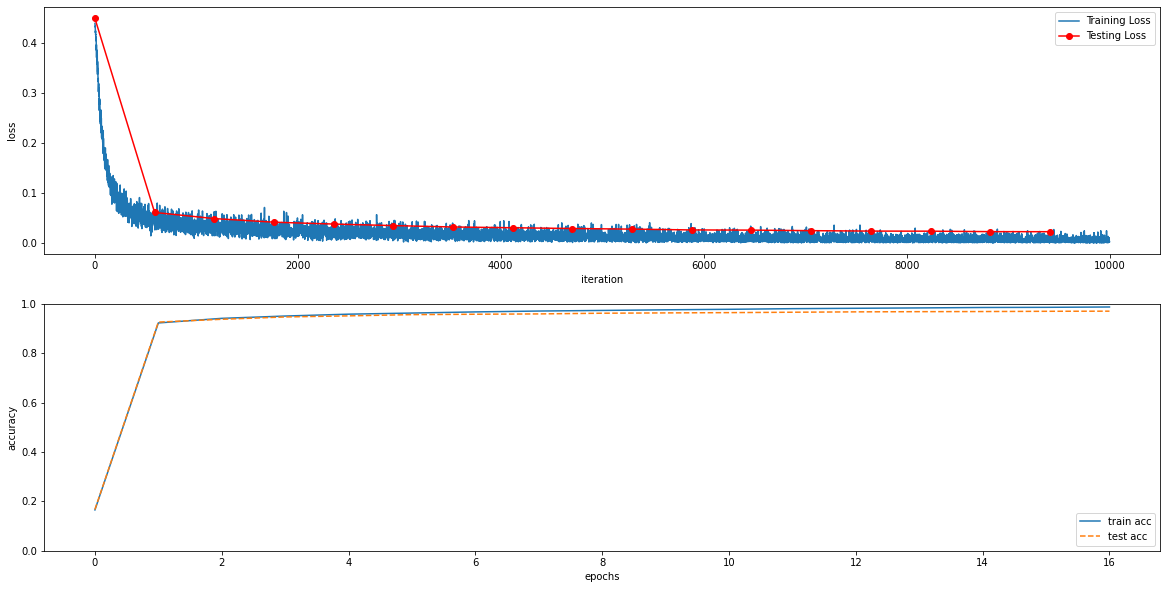

Training Time: 113.11966300010681 Seconds

Learning rate: 0.001 Accuracy for test: 0.9363


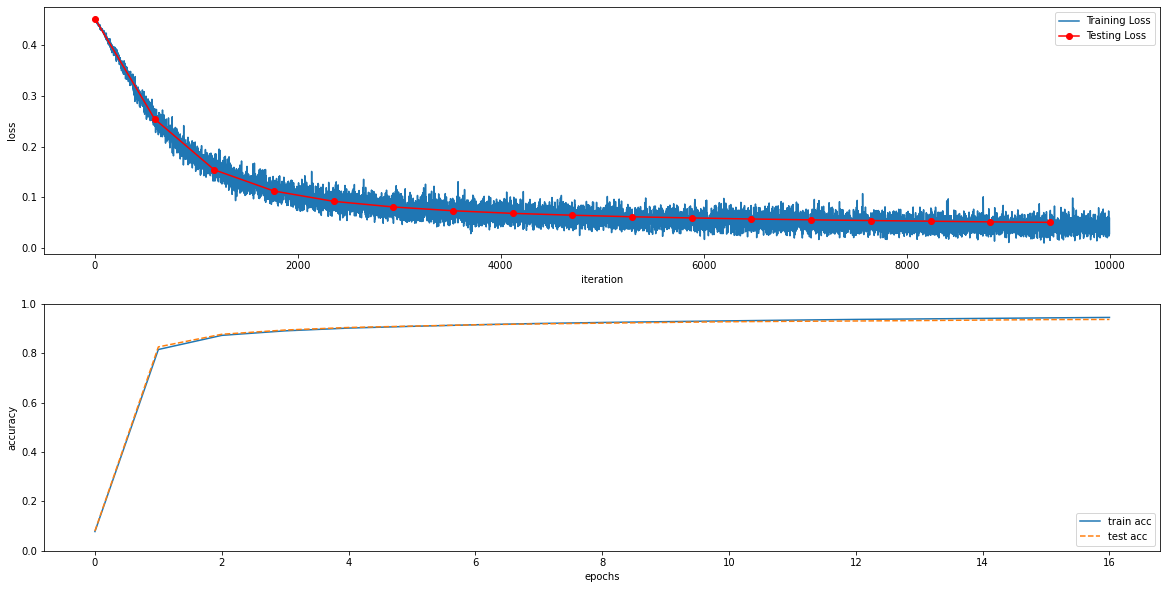

Training Time: 113.38753581047058 Seconds

Learning rate: 0.0001 Accuracy for test: 0.8622


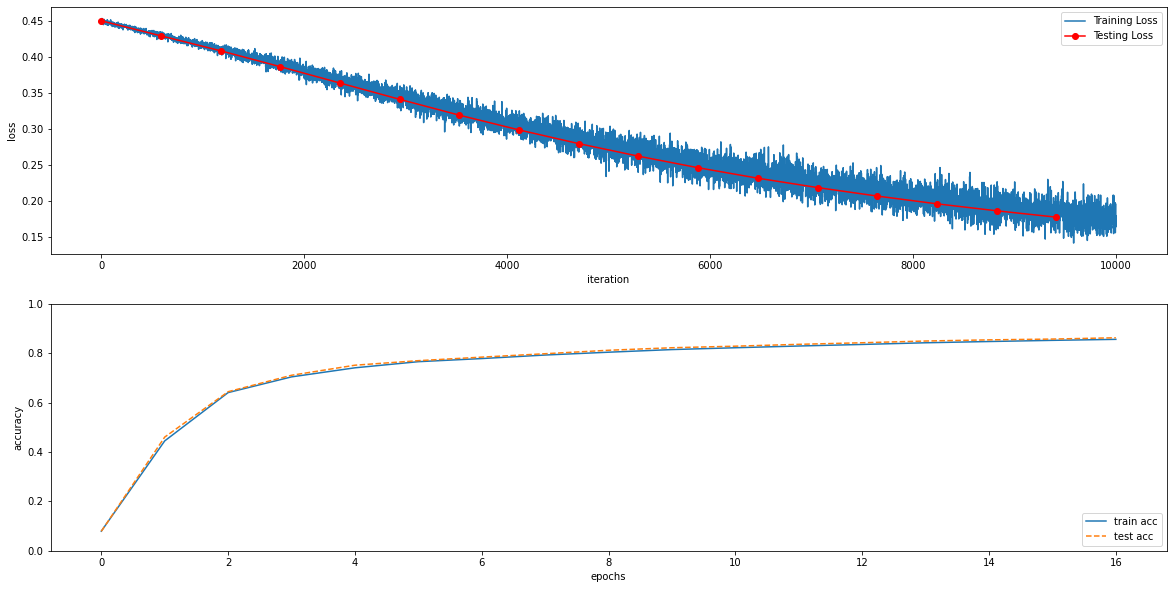

Training Time: 113.95202088356018 Seconds

Learning rate: 1e-05 Accuracy for test: 0.6411


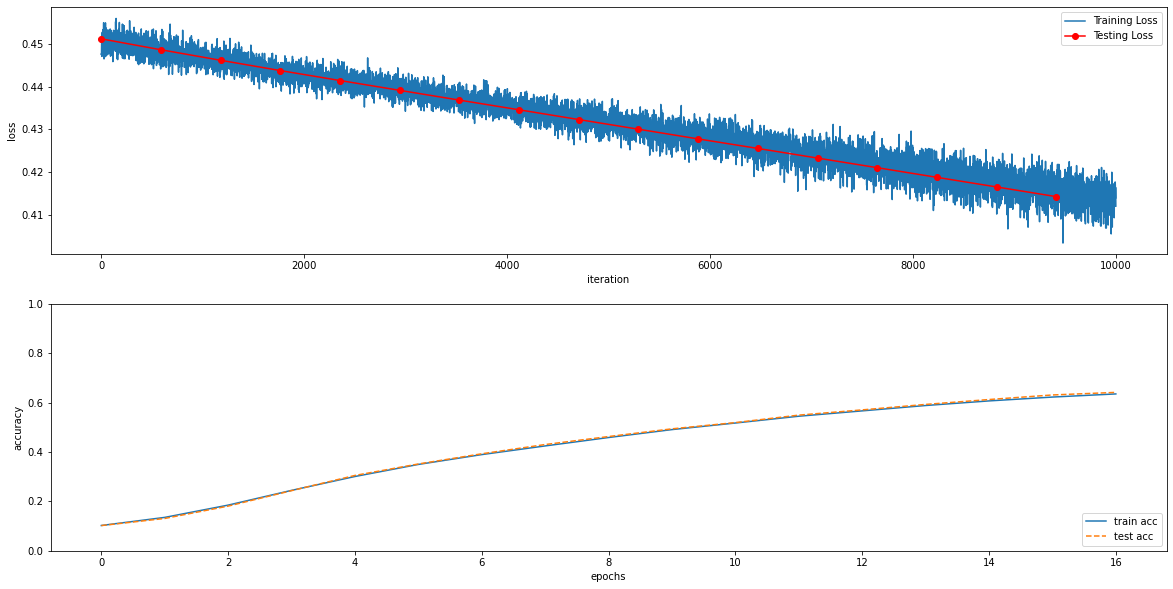

Training Time: 114.67355275154114 Seconds



In [8]:
learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
random.seed(1234)
for rate in learning_rate_list:
    start = time.time()
    network = TwoLayerNet(input_size=784, hidden_size=500, output_size=10, reg=1e-5)
    training_info, best_acc, best_params = \
        network.fit(dataset, iters_num, rate, lr_decay, iter_per_epoch, batch_size, p='False')
    print('Learning rate: ' + str(rate) + ' Accuracy for test: ' + str(best_acc))
    plot_(training_info)
    end = time.time()
    print('Training Time: %s Seconds' %(end-start))
    print('')

Small learning rate will cause loss decreases slowly and large learning rate will cause the accuracy converges to a low accuracy. The rate 0.01 might be a good choice.

### Regularization

Regularization weight: 0.01 Accuracy for test: 0.97


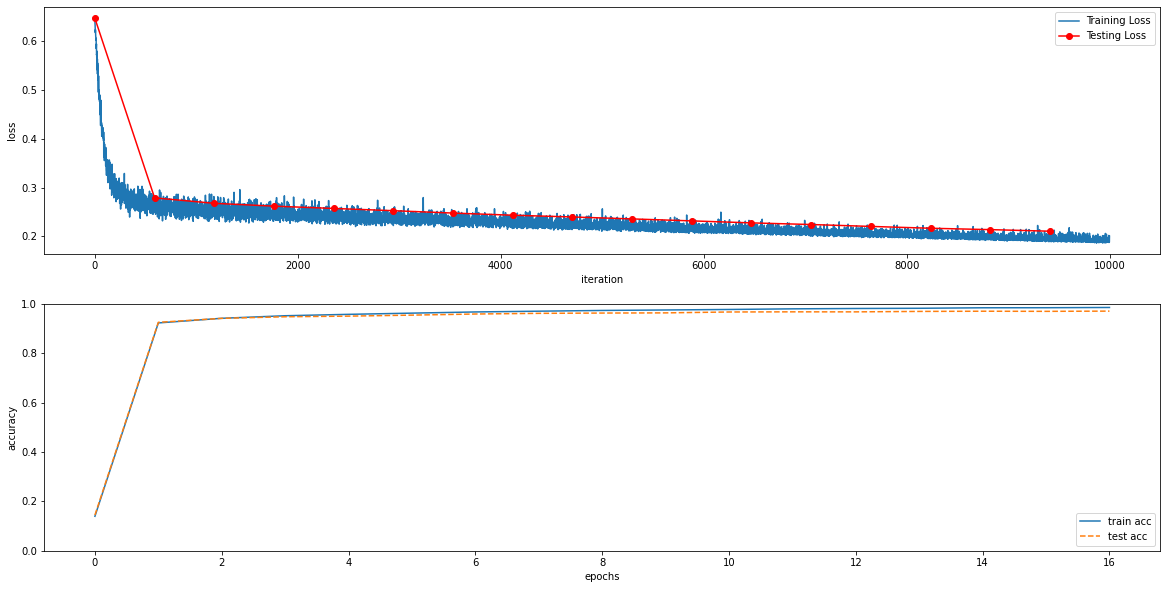

Training Time: 141.34838700294495 Seconds

Regularization weight: 0.001 Accuracy for test: 0.9698


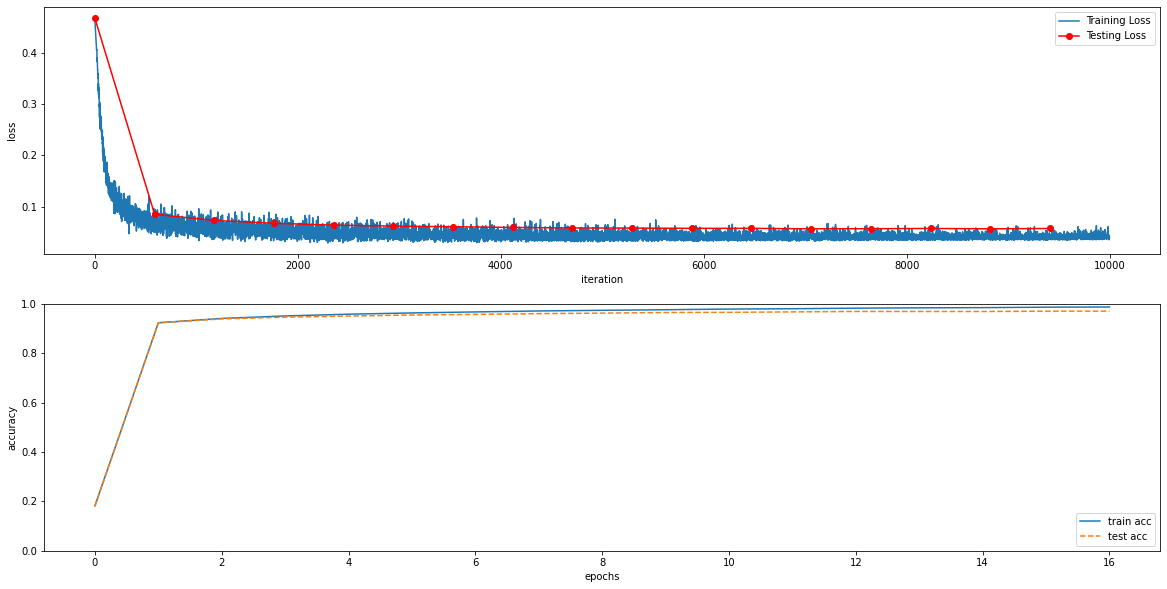

Training Time: 114.33667612075806 Seconds

Regularization weight: 0.0001 Accuracy for test: 0.9691


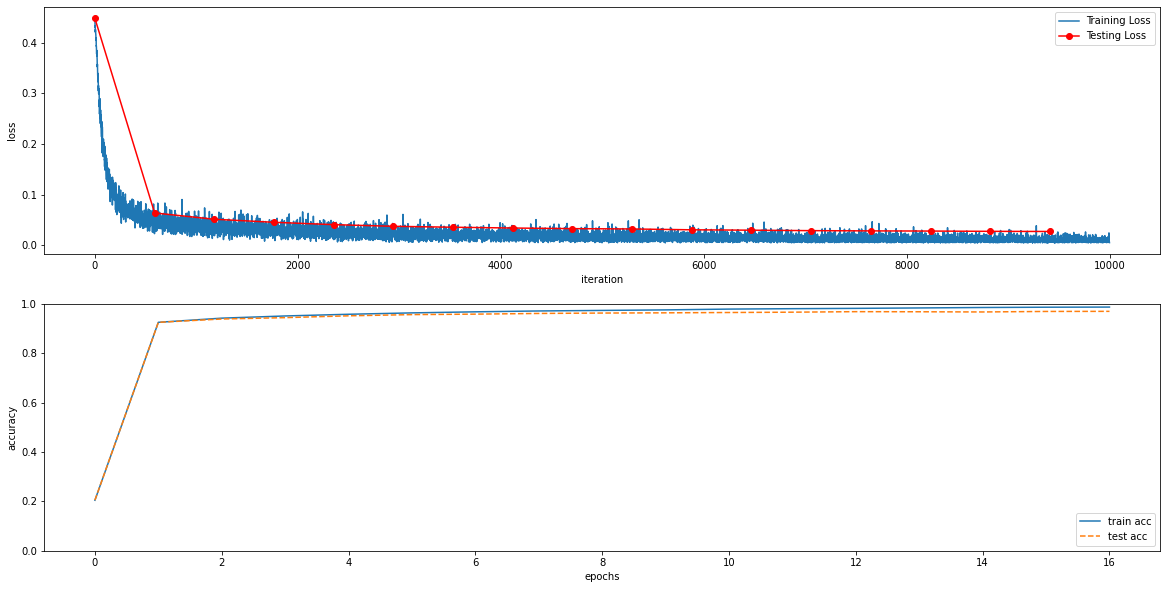

Training Time: 113.4384377002716 Seconds

Regularization weight: 1e-05 Accuracy for test: 0.9715


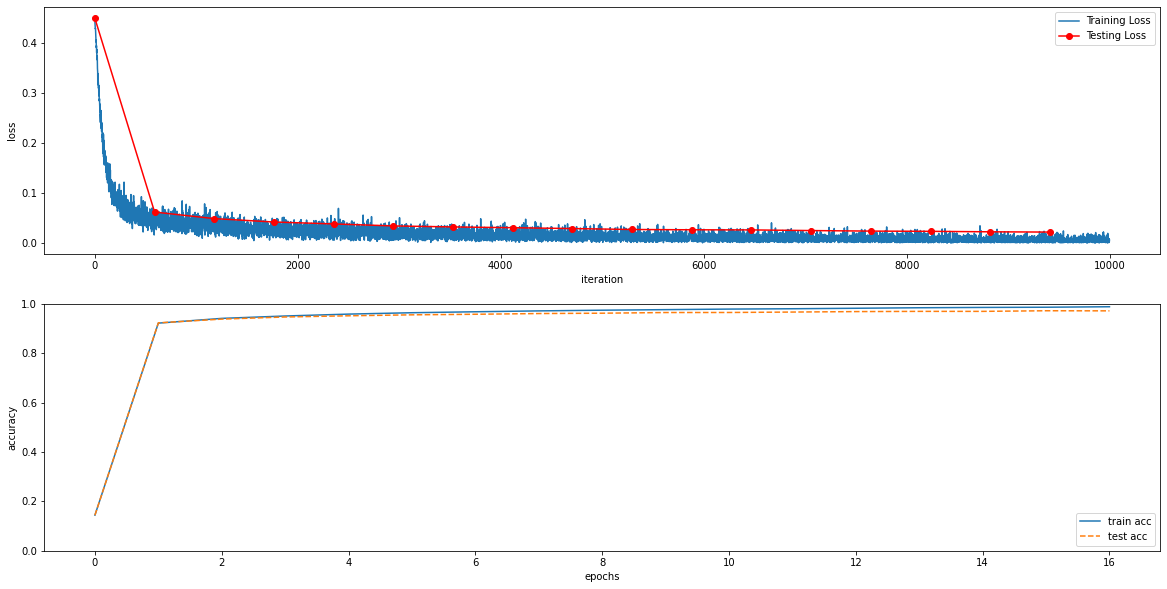

Training Time: 115.11356401443481 Seconds

Regularization weight: 1e-06 Accuracy for test: 0.9696


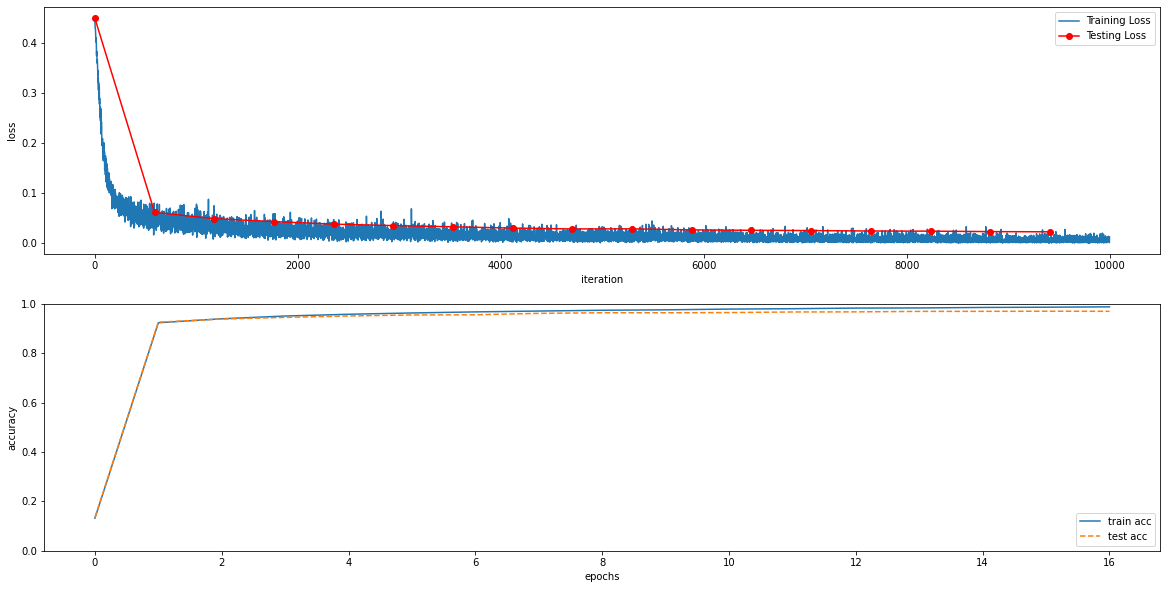

Training Time: 114.80028223991394 Seconds



In [12]:
reg_list = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
random.seed(1234)
for reg in reg_list:
    start = time.time()
    network = TwoLayerNet(input_size=784, hidden_size=500, output_size=10, reg=reg)
    training_info, best_acc, best_params = \
        network.fit(dataset, iters_num, 0.01, lr_decay, iter_per_epoch, batch_size, p='False')
    print('Regularization weight: ' + str(reg) + ' Accuracy for test: ' + str(best_acc))
    plot_(training_info)
    end = time.time()
    print('Training Time: %s Seconds' %(end-start))
    print('')

## 3. Visualization

0.975


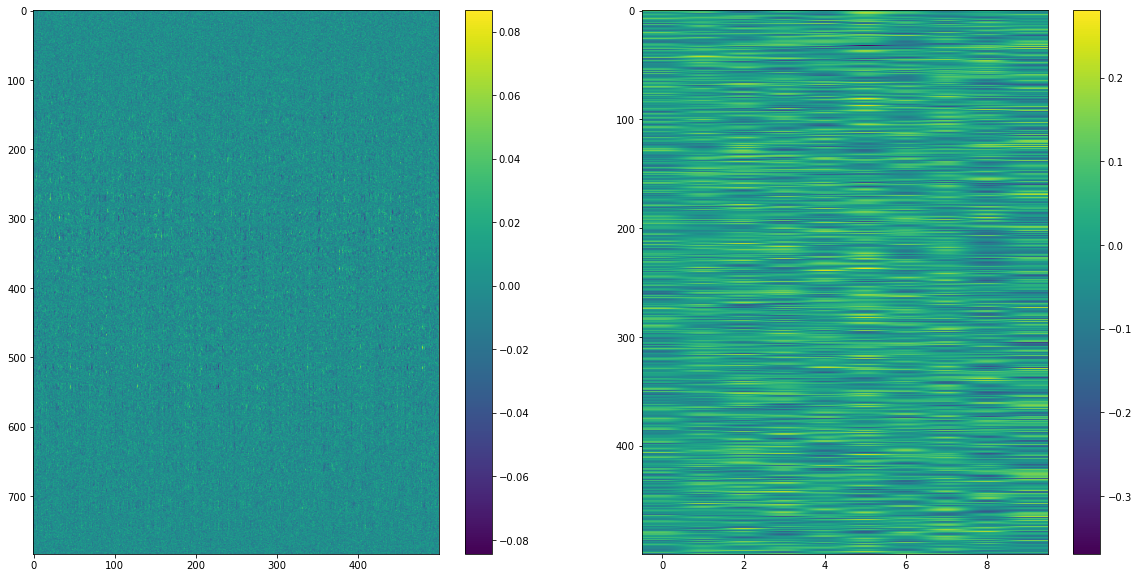

In [10]:
best_network = load(path + 'bestmodel')
test_acc = best_network.accuracy(test_img, test_label)
print(test_acc)
params = best_network.params
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(params['W1'], aspect='auto')
plt.colorbar()
plt.subplot(122)
plt.imshow(params['W2'], aspect='auto')
plt.colorbar()

The visualization of net parameters show that there are still some noises in this network. Our training might not be adequate.

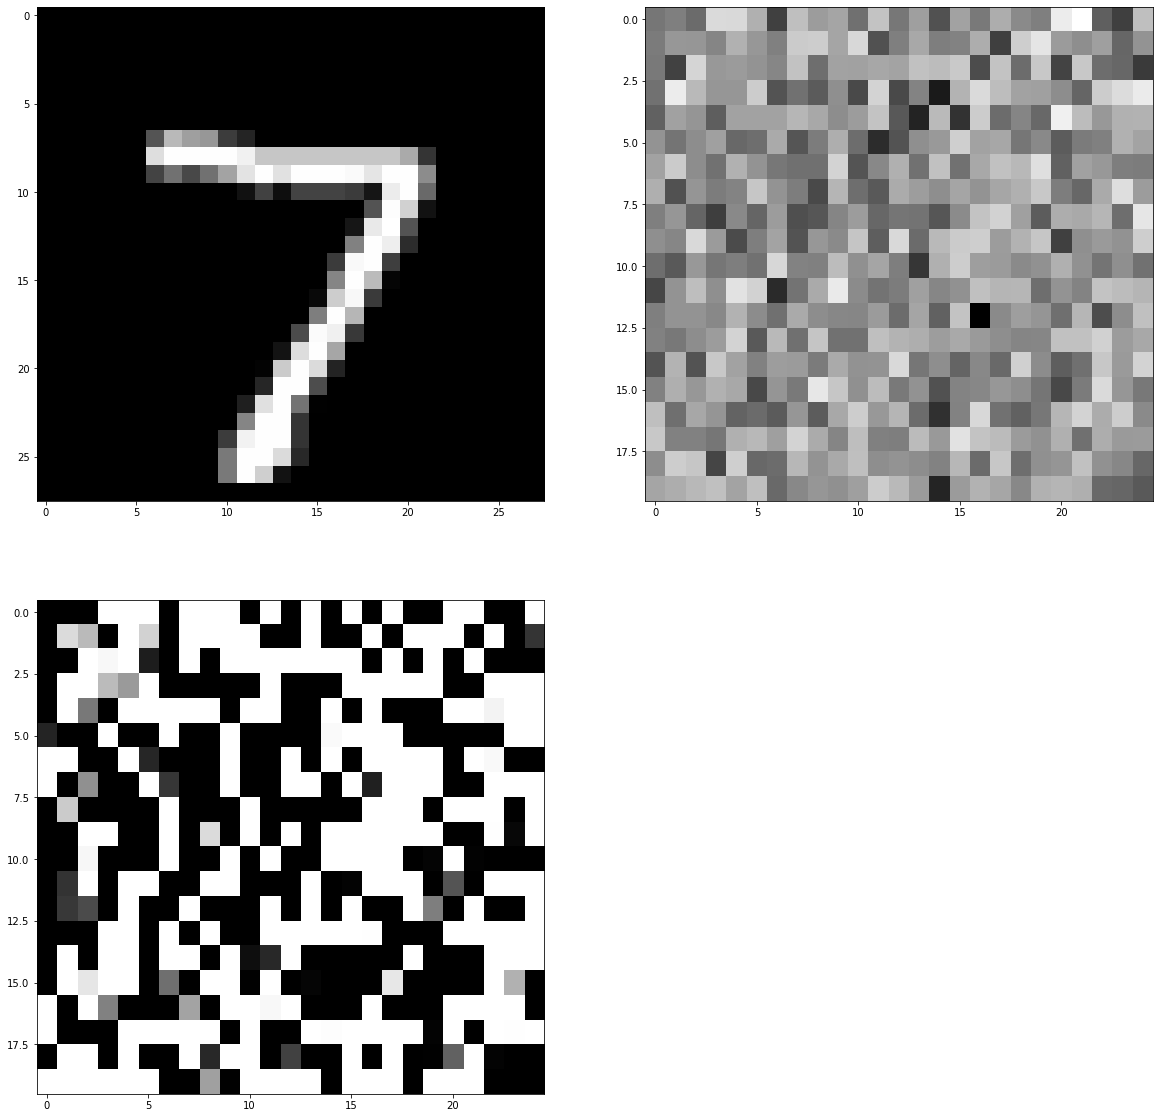

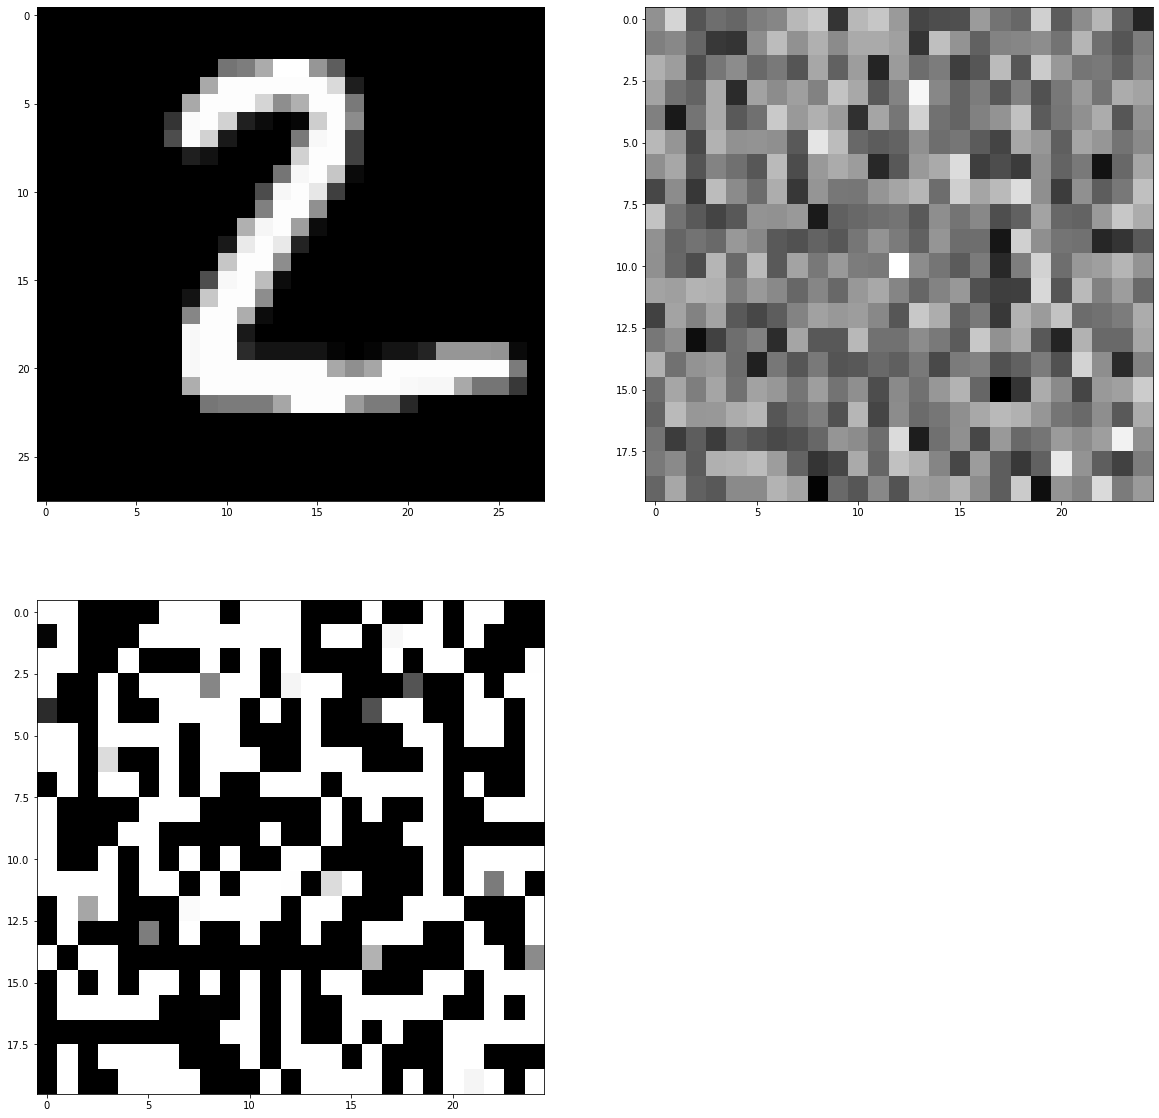

In [11]:
from twolayerNet import sigmoid, softmax
x = test_img[0]

a1 = np.dot(x, params['W1']) + params['b1']
# print(a1)
z1 = sigmoid(a1)
a2 = np.dot(z1, params['W2']) + params['b2']
y = softmax(a2)
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(x.reshape(28, 28, order='C'), aspect='auto', cmap=plt.cm.gray)
plt.subplot(222)
plt.imshow(a1.reshape(20, 25, order='C'), aspect='auto', cmap=plt.cm.gray)
plt.subplot(223)
plt.imshow(z1.reshape(20, 25, order='C'), aspect='auto', cmap=plt.cm.gray)

x = test_img[1]

a1 = np.dot(x, params['W1']) + params['b1']
# print(a1)
z1 = sigmoid(a1)
a2 = np.dot(z1, params['W2']) + params['b2']
y = softmax(a2)
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(x.reshape(28, 28, order='C'), aspect='auto', cmap=plt.cm.gray)
plt.subplot(222)
plt.imshow(a1.reshape(20, 25, order='C'), aspect='auto', cmap=plt.cm.gray)
plt.subplot(223)
plt.imshow(z1.reshape(20, 25, order='C'), aspect='auto', cmap=plt.cm.gray)

I tried to print the output of each layer on some samples. But I cannot find some significant connection between the original image and the output. It might be caused by the way I reconstruct the matrix from the orignal vector is incorrect.

## 

In a nutshell, the two-layer network performs good surprisingly. But I believe that there are some methods to improve it still.